In [1]:
import ipywidgets as widgets
from skimage import io
from skimage.color import rgb2grey
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np
import math 
from skimage.draw import line


In [2]:
#USER THINGS

selector = widgets.Dropdown(
    options=[('Scout View', 'photos/img1.jpg'), ('Scout View (large)', 'photos/img2.jpg'), ('Circle', 'photos/img3.jpg')],
    value='photos/img1.jpg',
    description='Image:',
)


slider_alpha = widgets.IntSlider(
    value=3,
    min=0,
    max=360,
    step=1,
    description='Alpha:',
    continuous_update=False,
    readout_format='d'
)

slider_n = widgets.IntSlider(
    value=10,
    min=0,
    max=100,
    step=1,
    description='Number n:',
    continuous_update=False,
    readout_format='d'
)

slider_l = widgets.IntSlider(
    value=3,
    min=0,
    max=100,
    step=1,
    description='Spread l [%]:',
    continuous_update=False,
    readout_format='d'
)

display(selector, slider_alpha, slider_n, slider_l)

Dropdown(description='Image:', options=(('Scout View', 'photos/img1.jpg'), ('Scout View (large)', 'photos/img2…

IntSlider(value=3, continuous_update=False, description='Alpha:', max=360)

IntSlider(value=10, continuous_update=False, description='Number n:')

IntSlider(value=3, continuous_update=False, description='Spread l [%]:')

wtf is going on
the beginning of move_them_all
[[0.009026536085825747, 0.01206268075192802, 0.013897712833545108, 0.016419990577889447, 0.01936428305168986, 0.02266121184183569, 0.02634716067083768, 0.030237268518518517, 0.03439767944724284, 0.039081430998817966, 0.04381581837788902, 0.04862413488529668, 0.05383659938851471, 0.05923256603118877, 0.06431781547799123, 0.0681554690249912, 0.07118161234864438, 0.07420234731999506, 0.07636322424268853, 0.07794244089461255, 0.07935515176342073, 0.08035455157338339, 0.08108614507406536, 0.08174189165694544, 0.08242368469028827, 0.0830535587709566, 0.08322596883749359, 0.08355608084416816, 0.08404795848540146, 0.08469627067569946, 0.08570743946474087, 0.08707060774728886, 0.0885852931701031, 0.09015341601375737, 0.09161385358661157, 0.0928585486604026, 0.09399682105970572, 0.0946339729768826, 0.09484943601450248, 0.09511612301514516, 0.09525972364380757, 0.09520778490945926, 0.09523861863836555, 0.09516883818843878, 0.09510059052230047, 0.0949

TypeError: list indices must be integers or slices, not tuple

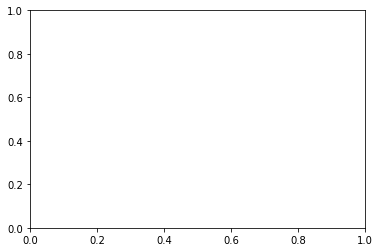

In [3]:
#FUNCTIONS
def square(file):
    im = io.imread(file)
    orig_rows, orig_cols = im.shape
    #print (orig_rows, orig_cols)
    if orig_rows < orig_cols:
        for addition in range(0,orig_cols-orig_rows):
            lst = np.array(list(float(0) for x in range(0,orig_cols)))
            im= np.vstack((im,lst))
    if orig_rows > orig_cols:
        for addition in range(0,orig_rows-orig_cols):
            lst = np.array(list([float(0)] for x in range(0,orig_rows)))
            im= np.hstack((im,lst))
    return im

def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles
    
def emitter_point(alpha, r):
    x = r * math.cos(math.radians(alpha))
    y = r * math.sin(math.radians(alpha))
    coordinates = np.c_[x, y]
    return coordinates
    
def detectors_points(alpha, l, r, n):
    #n - number of detectors
    #l - size of angle inside the circle
    detectors = []
    x = r * math.cos(math.radians(alpha) + np.pi - math.radians(l / 2))
    y = r * math.sin(math.radians(alpha) + np.pi - math.radians(l / 2))
    detectors.append(np.c_[x, y])
    for i in range(1, n):
        x = r * math.cos(math.radians(alpha) + np.pi - math.radians(l / 2) + i * math.radians(l / (n-1)))
        y = r * math.sin(math.radians(alpha) + np.pi - math.radians(l / 2) + i * math.radians(l / (n-1)))
        detectors.append(np.c_[x, y])
    return detectors

def change_coordinates(image):
    size = len(image)
    #print(np.amin(image))
    #print("len(image[0])", len(image[0]))
    #print("len(image[0][0])", len(image[0][0]))
    radius = size / 2
    #for i in image:
       # print("x: ",i[0], "y:", i[1])
    return radius
    

def sinogram_element(emitter, detectors, image, iteration, sinogram):
    change = change_coordinates(image)
    image = image / 256
    sineline = []
    line_points = []
    xe = int(emitter[0][0])
    ye = int(emitter[0][1])
    i = 0
    for detector in detectors:
        xd = int(detector[0][0])
        yd = int(detector[0][1])
        #print ("xe: ", xe, " ye: ", ye, " xd: ", xd, " yd: ", yd)
        xses, yses = line(xe, ye, xd, yd)
        size = len(xses)
        for i in range(size):
            line_points.append(image[int(yses[i] - change)][int(xses[i] - change)])
        average = np.mean(line_points)
        sineline.append(average)
        i = i+1
    return sineline

def move_them_all(image, delta_alpha, n, l):
    print("the beginning of move_them_all")
    iterations = int(360 / delta_alpha)
    alpha = 0
    sinogram = []
    r = change_coordinates(image)
    for i in range(iterations):
        emitter = emitter_point(alpha, r)
        detectors = detectors_points(alpha, l, r, n)
        sineline = sinogram_element(emitter, detectors, image, i, sinogram)
        sinogram.append(sineline)
        alpha = alpha + delta_alpha  
    return sinogram

print("wtf is going on")
image = rgb2grey(square(selector.value))
sinogram = move_them_all(image, 3, 50, 120)
print(sinogram)
fig, ax = plt.subplots()
for circle in sinogram:
    ax.scatter(circle[:, 0], circle[:, 1])
ax.set_aspect('equal')
plt.show()


In [7]:
image = rgb2grey(square(selector.value))

plt.figure(figsize=(16, 10))
plt.subplot(131)
plt.imshow(image, cmap=plt.cm.gray)
plt.subplot(132)
plt.imshow(image) 
plt.subplot(133)
plt.show()


NameError: name 'square' is not defined

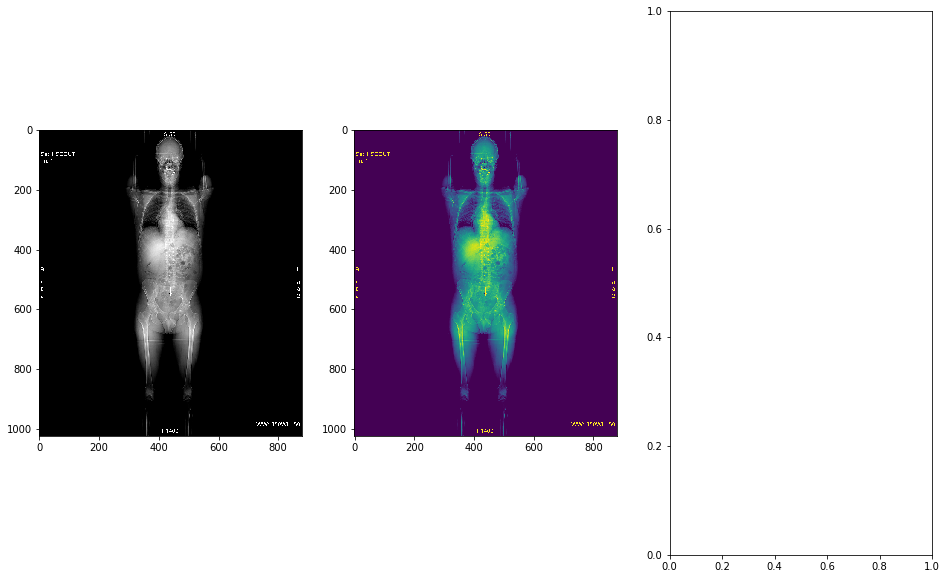

In [95]:
image = rgb2grey(io.imread(selector.value))
image = image/256
plt.figure(figsize=(16, 10))
plt.subplot(131)
plt.imshow(image, cmap=plt.cm.gray)
plt.subplot(132)
plt.imshow(image) 
plt.subplot(133)
plt.show()

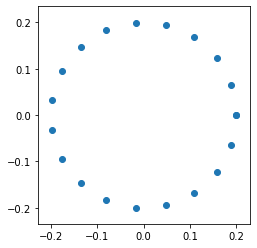